In [1]:
!pip install pandas matplotlib seaborn numpy

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
pip install pyspark

In [4]:
from pyspark.sql import SparkSession

In [5]:
spark = SparkSession.builder.appName("NYPD Arrests").getOrCreate()      #This creates a spark session
df = spark.read.csv("NYPD_Arrest_Data_2023.csv", header = True, inferSchema = True)

In [6]:
df.show(5)

+----------+-----------+-----+--------------------+-----+---------------+----------+----------+-----------+---------------+-----------------+---------+--------+---------+----------+----------+---------+----------+
|ARREST_KEY|ARREST_DATE|PD_CD|             PD_DESC|KY_CD|      OFNS_DESC|  LAW_CODE|LAW_CAT_CD|ARREST_BORO|ARREST_PRECINCT|JURISDICTION_CODE|AGE_GROUP|PERP_SEX|PERP_RACE|X_COORD_CD|Y_COORD_CD| Latitude| Longitude|
+----------+-----------+-----+--------------------+-----+---------------+----------+----------+-----------+---------------+-----------------+---------+--------+---------+----------+----------+---------+----------+
| 261209118| 01/01/2023|  109|ASSAULT 2,1,UNCLA...|106.0| FELONY ASSAULT|PL 1200501|         F|          K|             77|                0|    45-64|       F|    BLACK|    999335|    186085|40.677426|-73.945615|
| 262984267| 02/03/2023|  515|CONTROLLED SUBSTA...|117.0|DANGEROUS DRUGS|PL 2203901|         F|          K|             73|                0|   

In [7]:
df.printSchema()

root
 |-- ARREST_KEY: integer (nullable = true)
 |-- ARREST_DATE: string (nullable = true)
 |-- PD_CD: integer (nullable = true)
 |-- PD_DESC: string (nullable = true)
 |-- KY_CD: double (nullable = true)
 |-- OFNS_DESC: string (nullable = true)
 |-- LAW_CODE: string (nullable = true)
 |-- LAW_CAT_CD: string (nullable = true)
 |-- ARREST_BORO: string (nullable = true)
 |-- ARREST_PRECINCT: integer (nullable = true)
 |-- JURISDICTION_CODE: integer (nullable = true)
 |-- AGE_GROUP: string (nullable = true)
 |-- PERP_SEX: string (nullable = true)
 |-- PERP_RACE: string (nullable = true)
 |-- X_COORD_CD: integer (nullable = true)
 |-- Y_COORD_CD: integer (nullable = true)
 |-- Latitude: double (nullable = true)
 |-- Longitude: double (nullable = true)



In [8]:
df.schema['KY_CD'].dataType


DoubleType()

In [9]:
df.schema['Latitude'].dataType

DoubleType()

In [10]:
df.schema['Longitude'].dataType

DoubleType()

In [11]:
df.createTempView("arrests_table")     #Since already the View is created it is showing error

In [12]:
df = spark.sql("""
select *, CAST(KY_CD as INTEGER) as KEY_CODE,
TO_DATE(ARREST_DATE, 'MM/dd/yyyy') AS ARREST_DATE_N,
CAST(LATITUDE as FLOAT) as LATITUDE_N,
CAST(LONGITUDE as FLOAT) as LONGITUDE_N
from arrests_table""")

In [13]:
df.printSchema()

root
 |-- ARREST_KEY: integer (nullable = true)
 |-- ARREST_DATE: string (nullable = true)
 |-- PD_CD: integer (nullable = true)
 |-- PD_DESC: string (nullable = true)
 |-- KY_CD: double (nullable = true)
 |-- OFNS_DESC: string (nullable = true)
 |-- LAW_CODE: string (nullable = true)
 |-- LAW_CAT_CD: string (nullable = true)
 |-- ARREST_BORO: string (nullable = true)
 |-- ARREST_PRECINCT: integer (nullable = true)
 |-- JURISDICTION_CODE: integer (nullable = true)
 |-- AGE_GROUP: string (nullable = true)
 |-- PERP_SEX: string (nullable = true)
 |-- PERP_RACE: string (nullable = true)
 |-- X_COORD_CD: integer (nullable = true)
 |-- Y_COORD_CD: integer (nullable = true)
 |-- Latitude: double (nullable = true)
 |-- Longitude: double (nullable = true)
 |-- KEY_CODE: integer (nullable = true)
 |-- ARREST_DATE_N: date (nullable = true)
 |-- LATITUDE_N: float (nullable = true)
 |-- LONGITUDE_N: float (nullable = true)



In [14]:
df.select('ARREST_DATE_N').show()

+-------------+
|ARREST_DATE_N|
+-------------+
|   2023-01-01|
|   2023-02-03|
|   2023-02-15|
|   2023-01-04|
|   2023-02-13|
|   2023-01-17|
|   2023-01-23|
|   2023-03-04|
|   2023-01-25|
|   2023-03-17|
|   2023-01-30|
|   2023-02-02|
|   2023-02-09|
|   2023-04-04|
|   2023-03-03|
|   2023-04-13|
|   2023-04-25|
|   2023-03-16|
|   2023-02-18|
|   2023-03-21|
+-------------+
only showing top 20 rows



In [15]:
df = df.drop('KY_CD', 'ARREST_DATE', 'Latitude', 'Longitude')

In [16]:
df.printSchema()

root
 |-- ARREST_KEY: integer (nullable = true)
 |-- PD_CD: integer (nullable = true)
 |-- PD_DESC: string (nullable = true)
 |-- OFNS_DESC: string (nullable = true)
 |-- LAW_CODE: string (nullable = true)
 |-- LAW_CAT_CD: string (nullable = true)
 |-- ARREST_BORO: string (nullable = true)
 |-- ARREST_PRECINCT: integer (nullable = true)
 |-- JURISDICTION_CODE: integer (nullable = true)
 |-- AGE_GROUP: string (nullable = true)
 |-- PERP_SEX: string (nullable = true)
 |-- PERP_RACE: string (nullable = true)
 |-- X_COORD_CD: integer (nullable = true)
 |-- Y_COORD_CD: integer (nullable = true)
 |-- KEY_CODE: integer (nullable = true)
 |-- ARREST_DATE_N: date (nullable = true)
 |-- LATITUDE_N: float (nullable = true)
 |-- LONGITUDE_N: float (nullable = true)



In [17]:
rename_dict = {'ARREST_DATE_N': 'ARREST_DATE', 'LATITUDE_N': 'LATITUDE', 'LONGITUDE_N': 'LONGITUDE'}
for old_name, new_name in rename_dict.items():
  df = df.withColumnRenamed(old_name, new_name)

In [18]:
df.printSchema()

root
 |-- ARREST_KEY: integer (nullable = true)
 |-- PD_CD: integer (nullable = true)
 |-- PD_DESC: string (nullable = true)
 |-- OFNS_DESC: string (nullable = true)
 |-- LAW_CODE: string (nullable = true)
 |-- LAW_CAT_CD: string (nullable = true)
 |-- ARREST_BORO: string (nullable = true)
 |-- ARREST_PRECINCT: integer (nullable = true)
 |-- JURISDICTION_CODE: integer (nullable = true)
 |-- AGE_GROUP: string (nullable = true)
 |-- PERP_SEX: string (nullable = true)
 |-- PERP_RACE: string (nullable = true)
 |-- X_COORD_CD: integer (nullable = true)
 |-- Y_COORD_CD: integer (nullable = true)
 |-- KEY_CODE: integer (nullable = true)
 |-- ARREST_DATE: date (nullable = true)
 |-- LATITUDE: float (nullable = true)
 |-- LONGITUDE: float (nullable = true)



In [19]:
df.dtypes

[('ARREST_KEY', 'int'),
 ('PD_CD', 'int'),
 ('PD_DESC', 'string'),
 ('OFNS_DESC', 'string'),
 ('LAW_CODE', 'string'),
 ('LAW_CAT_CD', 'string'),
 ('ARREST_BORO', 'string'),
 ('ARREST_PRECINCT', 'int'),
 ('JURISDICTION_CODE', 'int'),
 ('AGE_GROUP', 'string'),
 ('PERP_SEX', 'string'),
 ('PERP_RACE', 'string'),
 ('X_COORD_CD', 'int'),
 ('Y_COORD_CD', 'int'),
 ('KEY_CODE', 'int'),
 ('ARREST_DATE', 'date'),
 ('LATITUDE', 'float'),
 ('LONGITUDE', 'float')]

In [20]:
from pyspark.sql.functions import col, sum

# Count NULL values for each column
null_counts = df.select([sum(col(c).isNull().cast("int")).alias(c) for c in df.columns])

# Show the result
null_counts.show()

+----------+-----+-------+---------+--------+----------+-----------+---------------+-----------------+---------+--------+---------+----------+----------+--------+-----------+--------+---------+
|ARREST_KEY|PD_CD|PD_DESC|OFNS_DESC|LAW_CODE|LAW_CAT_CD|ARREST_BORO|ARREST_PRECINCT|JURISDICTION_CODE|AGE_GROUP|PERP_SEX|PERP_RACE|X_COORD_CD|Y_COORD_CD|KEY_CODE|ARREST_DATE|LATITUDE|LONGITUDE|
+----------+-----+-------+---------+--------+----------+-----------+---------------+-----------------+---------+--------+---------+----------+----------+--------+-----------+--------+---------+
|         0|    0|      0|        0|       0|      1257|          0|              0|                0|        0|       0|        0|         0|         0|      13|          0|       0|        0|
+----------+-----+-------+---------+--------+----------+-----------+---------------+-----------------+---------+--------+---------+----------+----------+--------+-----------+--------+---------+



In [22]:
df.createTempView("arrest_tab")     #Since already the View is created it is showing error

In [23]:
query = "SELECT " + ", ".join([f"SUM(CASE WHEN {col} IS NULL THEN 1 ELSE 0 END) AS {col}_nulls" for col in df.columns]) + " FROM arrest_tab"

null_counts = spark.sql(query)
null_counts.show()



+----------------+-----------+-------------+---------------+--------------+----------------+-----------------+---------------------+-----------------------+---------------+--------------+---------------+----------------+----------------+--------------+-----------------+--------------+---------------+
|ARREST_KEY_nulls|PD_CD_nulls|PD_DESC_nulls|OFNS_DESC_nulls|LAW_CODE_nulls|LAW_CAT_CD_nulls|ARREST_BORO_nulls|ARREST_PRECINCT_nulls|JURISDICTION_CODE_nulls|AGE_GROUP_nulls|PERP_SEX_nulls|PERP_RACE_nulls|X_COORD_CD_nulls|Y_COORD_CD_nulls|KEY_CODE_nulls|ARREST_DATE_nulls|LATITUDE_nulls|LONGITUDE_nulls|
+----------------+-----------+-------------+---------------+--------------+----------------+-----------------+---------------------+-----------------------+---------------+--------------+---------------+----------------+----------------+--------------+-----------------+--------------+---------------+
|               0|          0|            0|              0|             0|            1257|  

In [24]:
# Identify numerical and categorical columns
numerical_cols = [c for c, dtype in df.dtypes if dtype in ("int", "bigint", "double", "float", "long")]
categorical_cols = [c for c, dtype in df.dtypes if dtype == "string"]

print("Numerical Columns:", numerical_cols)
print("Categorical Columns:", categorical_cols)

Numerical Columns: ['ARREST_KEY', 'PD_CD', 'ARREST_PRECINCT', 'JURISDICTION_CODE', 'X_COORD_CD', 'Y_COORD_CD', 'KEY_CODE', 'LATITUDE', 'LONGITUDE']
Categorical Columns: ['PD_DESC', 'OFNS_DESC', 'LAW_CODE', 'LAW_CAT_CD', 'ARREST_BORO', 'AGE_GROUP', 'PERP_SEX', 'PERP_RACE']


In [25]:
from pyspark.sql.functions import mean, col
for c in numerical_cols:
    mean_value = df.select(mean(col(c))).collect()[0][0]  # Compute mean
    df = df.fillna({c: mean_value})  # Fill NULLs with mean


In [26]:
from pyspark.sql.functions import count, desc
for i in categorical_cols:
   mode_value = df.groupBy(i).count().orderBy(desc("count")).first()[0]
   print(df.groupBy(i).count().orderBy(desc("count")).first())
   print(mode_value)
   df = df.fillna({c : mode_value})

Row(PD_DESC='ASSAULT 3', count=18384)
ASSAULT 3
Row(OFNS_DESC='ASSAULT 3 & RELATED OFFENSES', count=25200)
ASSAULT 3 & RELATED OFFENSES
Row(LAW_CODE='PL 1200001', count=17983)
PL 1200001
Row(LAW_CAT_CD='M', count=93347)
M
Row(ARREST_BORO='K', count=46825)
K
Row(AGE_GROUP='25-44', count=97601)
25-44
Row(PERP_SEX='M', count=137574)
M
Row(PERP_RACE='BLACK', count=82041)
BLACK


In [27]:
from pyspark.sql.functions import col, sum

# Count NULL values for each column
null_counts = df.select([sum(col(c).isNull().cast("int")).alias(c) for c in df.columns])

# Show the result
null_counts.show()

+----------+-----+-------+---------+--------+----------+-----------+---------------+-----------------+---------+--------+---------+----------+----------+--------+-----------+--------+---------+
|ARREST_KEY|PD_CD|PD_DESC|OFNS_DESC|LAW_CODE|LAW_CAT_CD|ARREST_BORO|ARREST_PRECINCT|JURISDICTION_CODE|AGE_GROUP|PERP_SEX|PERP_RACE|X_COORD_CD|Y_COORD_CD|KEY_CODE|ARREST_DATE|LATITUDE|LONGITUDE|
+----------+-----+-------+---------+--------+----------+-----------+---------------+-----------------+---------+--------+---------+----------+----------+--------+-----------+--------+---------+
|         0|    0|      0|        0|       0|      1257|          0|              0|                0|        0|       0|        0|         0|         0|       0|          0|       0|        0|
+----------+-----+-------+---------+--------+----------+-----------+---------------+-----------------+---------+--------+---------+----------+----------+--------+-----------+--------+---------+



In [29]:
query = "SELECT " + ", ".join([f"SUM(CASE WHEN {col} IS NULL THEN 1 ELSE 0 END) AS {col}_nulls" for col in df.columns]) + " FROM arrest_tab"

null_counts = spark.sql(query)
null_counts.show()



+----------------+-----------+-------------+---------------+--------------+----------------+-----------------+---------------------+-----------------------+---------------+--------------+---------------+----------------+----------------+--------------+-----------------+--------------+---------------+
|ARREST_KEY_nulls|PD_CD_nulls|PD_DESC_nulls|OFNS_DESC_nulls|LAW_CODE_nulls|LAW_CAT_CD_nulls|ARREST_BORO_nulls|ARREST_PRECINCT_nulls|JURISDICTION_CODE_nulls|AGE_GROUP_nulls|PERP_SEX_nulls|PERP_RACE_nulls|X_COORD_CD_nulls|Y_COORD_CD_nulls|KEY_CODE_nulls|ARREST_DATE_nulls|LATITUDE_nulls|LONGITUDE_nulls|
+----------------+-----------+-------------+---------------+--------------+----------------+-----------------+---------------------+-----------------------+---------------+--------------+---------------+----------------+----------------+--------------+-----------------+--------------+---------------+
|               0|          0|            0|              0|             0|            1257|  

In [30]:
df.select('LAW_CAT_CD').show(5)

+----------+
|LAW_CAT_CD|
+----------+
|         F|
|         F|
|         F|
|         F|
|         F|
+----------+
only showing top 5 rows



In [31]:
df.select('ARREST_DATE').show(5)

+-----------+
|ARREST_DATE|
+-----------+
| 2023-01-01|
| 2023-02-03|
| 2023-02-15|
| 2023-01-04|
| 2023-02-13|
+-----------+
only showing top 5 rows



In [32]:
df = df.dropna(subset=["LAW_CAT_CD"])

In [33]:
from pyspark.sql.functions import when

df = df.withColumn(
    "age_numeric",
    when(col("age_group") == "<18", 1)
    .when(col("age_group") == "18-24", 2)
    .when(col("age_group") == "25-44", 3)
    .when(col("age_group") == "45-64", 4)
    .when(col("age_group") == "65+", 5)
    .otherwise(0)  # Assign 0 to unknown values
)

In [34]:
df.show(10)

+----------+-----+--------------------+---------------+----------+----------+-----------+---------------+-----------------+---------+--------+---------+----------+----------+--------+-----------+---------+----------+-----------+
|ARREST_KEY|PD_CD|             PD_DESC|      OFNS_DESC|  LAW_CODE|LAW_CAT_CD|ARREST_BORO|ARREST_PRECINCT|JURISDICTION_CODE|AGE_GROUP|PERP_SEX|PERP_RACE|X_COORD_CD|Y_COORD_CD|KEY_CODE|ARREST_DATE| LATITUDE| LONGITUDE|age_numeric|
+----------+-----+--------------------+---------------+----------+----------+-----------+---------------+-----------------+---------+--------+---------+----------+----------+--------+-----------+---------+----------+-----------+
| 261209118|  109|ASSAULT 2,1,UNCLA...| FELONY ASSAULT|PL 1200501|         F|          K|             77|                0|    45-64|       F|    BLACK|    999335|    186085|     106| 2023-01-01|40.677425| -73.94562|          4|
| 262984267|  515|CONTROLLED SUBSTA...|DANGEROUS DRUGS|PL 2203901|         F|       

In [35]:
df.groupBy("age_group").count().show()

+---------+-----+
|age_group|count|
+---------+-----+
|      <18| 6244|
|    25-44|96835|
|      65+| 2778|
|    18-24|29825|
|    45-64|33156|
+---------+-----+



In [36]:
df.groupBy("age_numeric").count().orderBy(desc("count")).show()

+-----------+-----+
|age_numeric|count|
+-----------+-----+
|          3|96835|
|          4|33156|
|          2|29825|
|          1| 6244|
|          5| 2778|
+-----------+-----+



In [37]:
from pyspark.sql.functions import desc

df.groupBy("age_numeric").count().orderBy(desc("age_numeric")).show()

+-----------+-----+
|age_numeric|count|
+-----------+-----+
|          5| 2778|
|          4|33156|
|          3|96835|
|          2|29825|
|          1| 6244|
+-----------+-----+



In [38]:
df.groupBy("OFNS_DESC").count().show()

+--------------------+-----+
|           OFNS_DESC|count|
+--------------------+-----+
|OTHER TRAFFIC INF...| 1615|
|ANTICIPATORY OFFE...|   20|
|   FELONY SEX CRIMES|    2|
|OTHER OFFENSES RE...| 4123|
|VEHICLE AND TRAFF...| 9442|
|KIDNAPPING & RELA...|   81|
|HOMICIDE-NEGLIGEN...|    2|
|OFF. AGNST PUB OR...| 3044|
|      FELONY ASSAULT|16030|
|OFFENSES RELATED ...|   30|
|ALCOHOLIC BEVERAG...|  118|
|CRIMINAL MISCHIEF...| 8333|
|         THEFT-FRAUD|  155|
|   THEFT OF SERVICES|  111|
|MURDER & NON-NEGL...| 1424|
|            JOSTLING|   93|
|MISCELLANEOUS PEN...|11132|
|               ARSON|  115|
|OFFENSES AGAINST ...| 1087|
|            GAMBLING|  296|
+--------------------+-----+
only showing top 20 rows



In [39]:
df.groupBy("PD_CD").count().show()

+-----+-----+
|PD_CD|count|
+-----+-----+
|  737|    2|
|  808|   51|
|  879|   25|
|  799|   72|
|  918|  109|
|  513|    5|
|  961|    1|
|  633|    2|
|  155|   55|
|  744|  430|
|  193|    4|
|  101|18384|
|  115|  985|
|  847|  807|
|  939|   10|
|  874|   10|
|  183|   41|
|  596|   63|
|  762|   13|
|  784|    7|
+-----+-----+
only showing top 20 rows



In [40]:
df.groupBy("JURISDICTION_CODE").count().show()

+-----------------+-----+
|JURISDICTION_CODE|count|
+-----------------+-----+
|               85|   10|
|                1| 7966|
|               52|    6|
|               13|    7|
|                6|    2|
|                3| 1341|
|               15|  267|
|               88|    7|
|               17|  420|
|               72|  376|
|                4|   58|
|                7|   71|
|               87|  183|
|               51|   29|
|               69|    7|
|               97|  421|
|               73|  300|
|               11|  267|
|               71|  138|
|               14|   86|
+-----------------+-----+
only showing top 20 rows



In [41]:
spark.catalog.listTables()


[Table(name='arrest_tab', catalog=None, namespace=[], description=None, tableType='TEMPORARY', isTemporary=True),
 Table(name='arrests_table', catalog=None, namespace=[], description=None, tableType='TEMPORARY', isTemporary=True)]

In [42]:
df.printSchema()

root
 |-- ARREST_KEY: integer (nullable = true)
 |-- PD_CD: integer (nullable = true)
 |-- PD_DESC: string (nullable = true)
 |-- OFNS_DESC: string (nullable = true)
 |-- LAW_CODE: string (nullable = true)
 |-- LAW_CAT_CD: string (nullable = true)
 |-- ARREST_BORO: string (nullable = true)
 |-- ARREST_PRECINCT: integer (nullable = true)
 |-- JURISDICTION_CODE: integer (nullable = true)
 |-- AGE_GROUP: string (nullable = true)
 |-- PERP_SEX: string (nullable = true)
 |-- PERP_RACE: string (nullable = true)
 |-- X_COORD_CD: integer (nullable = true)
 |-- Y_COORD_CD: integer (nullable = true)
 |-- KEY_CODE: integer (nullable = true)
 |-- ARREST_DATE: date (nullable = true)
 |-- LATITUDE: float (nullable = false)
 |-- LONGITUDE: float (nullable = true)
 |-- age_numeric: integer (nullable = false)



In [43]:
df.show(5)

+----------+-----+--------------------+---------------+----------+----------+-----------+---------------+-----------------+---------+--------+---------+----------+----------+--------+-----------+---------+---------+-----------+
|ARREST_KEY|PD_CD|             PD_DESC|      OFNS_DESC|  LAW_CODE|LAW_CAT_CD|ARREST_BORO|ARREST_PRECINCT|JURISDICTION_CODE|AGE_GROUP|PERP_SEX|PERP_RACE|X_COORD_CD|Y_COORD_CD|KEY_CODE|ARREST_DATE| LATITUDE|LONGITUDE|age_numeric|
+----------+-----+--------------------+---------------+----------+----------+-----------+---------------+-----------------+---------+--------+---------+----------+----------+--------+-----------+---------+---------+-----------+
| 261209118|  109|ASSAULT 2,1,UNCLA...| FELONY ASSAULT|PL 1200501|         F|          K|             77|                0|    45-64|       F|    BLACK|    999335|    186085|     106| 2023-01-01|40.677425|-73.94562|          4|
| 262984267|  515|CONTROLLED SUBSTA...|DANGEROUS DRUGS|PL 2203901|         F|          K

In [44]:
df.groupBy("LAW_CAT_CD").count().show()

+----------+-----+
|LAW_CAT_CD|count|
+----------+-----+
|         F|73866|
|         M|93347|
|         V|  973|
|         9|  459|
|         I|  193|
+----------+-----+



In [45]:
df.groupBy("ARREST_BORO").count().show()

+-----------+-----+
|ARREST_BORO|count|
+-----------+-----+
|          K|46680|
|          Q|36094|
|          B|39692|
|          M|38964|
|          S| 7408|
+-----------+-----+



In [46]:
df.groupBy("PERP_RACE").count().show()

+--------------------+-----+
|           PERP_RACE|count|
+--------------------+-----+
|               WHITE|16230|
|               BLACK|81626|
|AMERICAN INDIAN/A...|  550|
|      BLACK HISPANIC|16303|
|      WHITE HISPANIC|42707|
|             UNKNOWN| 2440|
|ASIAN / PACIFIC I...| 8982|
+--------------------+-----+



In [47]:
df.groupBy("PERP_SEX").count().show()

+--------+------+
|PERP_SEX| count|
+--------+------+
|       F| 28909|
|       M|136439|
|       U|  3490|
+--------+------+



In [48]:
df.groupBy("ARREST_PRECINCT").count().show()

+---------------+-----+
|ARREST_PRECINCT|count|
+---------------+-----+
|             78| 1341|
|            108| 1625|
|             34| 2147|
|            101| 1370|
|            115| 2589|
|             81| 1414|
|             28| 1823|
|             76| 1005|
|             26|  943|
|             44| 5363|
|            103| 4581|
|             22|   68|
|            122| 1203|
|            111|  652|
|             47| 3259|
|              1| 1664|
|             52| 4074|
|             13| 2001|
|              6| 1716|
|             40| 5381|
+---------------+-----+
only showing top 20 rows



In [49]:
df.groupBy("OFNS_DESC").count().orderBy(desc("OFNS_DESC")).show()

+--------------------+-----+
|           OFNS_DESC|count|
+--------------------+-----+
|VEHICLE AND TRAFF...| 9442|
|UNLAWFUL POSS. WE...|    1|
|UNAUTHORIZED USE ...|  495|
|         THEFT-FRAUD|  155|
|   THEFT OF SERVICES|  111|
|          SEX CRIMES| 3901|
|             ROBBERY| 8169|
|                RAPE|  529|
|PROSTITUTION & RE...|  192|
|POSSESSION OF STO...| 2738|
|       PETIT LARCENY|18025|
|    PARKING OFFENSES|    3|
|OTHER TRAFFIC INF...| 1615|
|OTHER STATE LAWS ...|    9|
|OTHER STATE LAWS ...|  316|
|    OTHER STATE LAWS| 1086|
|OTHER OFFENSES RE...| 4123|
|OFFENSES RELATED ...|   30|
|OFFENSES INVOLVIN...| 3846|
|OFFENSES AGAINST ...| 1087|
+--------------------+-----+
only showing top 20 rows



In [50]:
df.groupBy("age_group", "OFNS_DESC").count().show()


+---------+--------------------+-----+
|age_group|           OFNS_DESC|count|
+---------+--------------------+-----+
|    18-24|   DANGEROUS WEAPONS| 1998|
|      65+|ENDAN WELFARE INCOMP|    1|
|    18-24|NYS LAWS-UNCLASSI...|  117|
|    45-64|          KIDNAPPING|    5|
|    18-24|       PETIT LARCENY| 2047|
|      <18|OTHER OFFENSES RE...|   20|
|    18-24|UNLAWFUL POSS. WE...|    1|
|      65+|OTHER TRAFFIC INF...|   17|
|      65+|            GAMBLING|   13|
|      <18|          SEX CRIMES|  120|
|      65+|   DANGEROUS WEAPONS|   93|
|    25-44| ADMINISTRATIVE CODE|   97|
|      <18|PROSTITUTION & RE...|    1|
|    45-64|       HARRASSMENT 2|   19|
|      65+|       GRAND LARCENY|  121|
|      65+|GRAND LARCENY OF ...|    3|
|      <18|GRAND LARCENY OF ...|  304|
|    18-24|         THEFT-FRAUD|   33|
|    25-44|     DANGEROUS DRUGS| 6330|
|      65+|     DANGEROUS DRUGS|  245|
+---------+--------------------+-----+
only showing top 20 rows



In [51]:
df.groupBy("age_group", "OFNS_DESC").count().orderBy(desc("count")).show()



+---------+--------------------+-----+
|age_group|           OFNS_DESC|count|
+---------+--------------------+-----+
|    25-44|ASSAULT 3 & RELAT...|14613|
|    25-44|       PETIT LARCENY|10028|
|    25-44|      FELONY ASSAULT| 9463|
|    25-44|MISCELLANEOUS PEN...| 6948|
|    25-44|     DANGEROUS DRUGS| 6330|
|    25-44|VEHICLE AND TRAFF...| 5995|
|    45-64|       PETIT LARCENY| 5465|
|    25-44|CRIMINAL MISCHIEF...| 5086|
|    45-64|ASSAULT 3 & RELAT...| 4979|
|    18-24|ASSAULT 3 & RELAT...| 4207|
|    25-44|       GRAND LARCENY| 4040|
|    25-44|   DANGEROUS WEAPONS| 3696|
|    25-44|             ROBBERY| 3680|
|    45-64|     DANGEROUS DRUGS| 3546|
|    25-44|OFFENSES AGAINST ...| 3156|
|    45-64|      FELONY ASSAULT| 2976|
|    25-44|            BURGLARY| 2654|
|    18-24|      FELONY ASSAULT| 2569|
|    25-44|OTHER OFFENSES RE...| 2514|
|    25-44|          SEX CRIMES| 2470|
+---------+--------------------+-----+
only showing top 20 rows



In [52]:
df.groupBy("PERP_SEX", "age_group").count().orderBy(desc("count")).show()



+--------+---------+-----+
|PERP_SEX|age_group|count|
+--------+---------+-----+
|       M|    25-44|77944|
|       M|    45-64|27494|
|       M|    18-24|23691|
|       F|    25-44|16892|
|       F|    18-24| 5506|
|       M|      <18| 5033|
|       F|    45-64| 4963|
|       M|      65+| 2277|
|       U|    25-44| 1999|
|       F|      <18| 1113|
|       U|    45-64|  699|
|       U|    18-24|  628|
|       F|      65+|  435|
|       U|      <18|   98|
|       U|      65+|   66|
+--------+---------+-----+



In [53]:
df.createOrReplaceTempView("crime_data")

In [54]:
query = """
    SELECT PERP_SEX, age_group, COUNT(*) AS crimes_commited_by_sex_and_age_group
    FROM crime_data
    GROUP BY PERP_SEX, age_group
    ORDER BY PERP_SEX ASC, age_group
"""

df_result = spark.sql(query)
df_result.show()

+--------+---------+------------------------------------+
|PERP_SEX|age_group|crimes_commited_by_sex_and_age_group|
+--------+---------+------------------------------------+
|       F|    18-24|                                5506|
|       F|    25-44|                               16892|
|       F|    45-64|                                4963|
|       F|      65+|                                 435|
|       F|      <18|                                1113|
|       M|    18-24|                               23691|
|       M|    25-44|                               77944|
|       M|    45-64|                               27494|
|       M|      65+|                                2277|
|       M|      <18|                                5033|
|       U|    18-24|                                 628|
|       U|    25-44|                                1999|
|       U|    45-64|                                 699|
|       U|      65+|                                  66|
|       U|    

In [55]:
query = "SELECT PERP_SEX, age_group, PERP_RACE, count(*) as crimes_commited_by_age_sex_race FROM crime_data GROUP BY PERP_SEX, age_group, PERP_RACE ORDER BY PERP_SEX ASC, age_group"
df_result = spark.sql(query)
df_result.show()

+--------+---------+--------------------+-------------------------------+
|PERP_SEX|age_group|           PERP_RACE|crimes_commited_by_age_sex_race|
+--------+---------+--------------------+-------------------------------+
|       F|    18-24|             UNKNOWN|                             71|
|       F|    18-24|      WHITE HISPANIC|                           1594|
|       F|    18-24|      BLACK HISPANIC|                            510|
|       F|    18-24|               BLACK|                           2764|
|       F|    18-24|AMERICAN INDIAN/A...|                             10|
|       F|    18-24|ASIAN / PACIFIC I...|                            205|
|       F|    18-24|               WHITE|                            352|
|       F|    25-44|               WHITE|                           2089|
|       F|    25-44|             UNKNOWN|                            188|
|       F|    25-44|      BLACK HISPANIC|                           1453|
|       F|    25-44|ASIAN / PACIFIC I.

In [56]:
query = """ select AGE_GROUP, LAW_CAT_CD, count(*)
from crime_data
group by AGE_GROUP, LAW_CAT_CD
order by AGE_GROUP
"""
df_result = spark.sql(query)
df_result.show()


+---------+----------+--------+
|AGE_GROUP|LAW_CAT_CD|count(1)|
+---------+----------+--------+
|    18-24|         I|      35|
|    18-24|         F|   14069|
|    18-24|         9|      68|
|    18-24|         V|     145|
|    18-24|         M|   15508|
|    25-44|         9|     301|
|    25-44|         V|     641|
|    25-44|         M|   54841|
|    25-44|         I|     101|
|    25-44|         F|   40951|
|    45-64|         I|      49|
|    45-64|         M|   19623|
|    45-64|         F|   13221|
|    45-64|         9|      84|
|    45-64|         V|     179|
|      65+|         M|    1668|
|      65+|         F|    1091|
|      65+|         I|       7|
|      65+|         9|       5|
|      65+|         V|       7|
+---------+----------+--------+
only showing top 20 rows



In [57]:
query = """ select AGE_GROUP, LAW_CAT_CD, count(*)
from crime_data
group by AGE_GROUP, LAW_CAT_CD
having LAW_CAT_CD = 'F'
order by AGE_GROUP
"""
df_result = spark.sql(query)
df_result.show()


+---------+----------+--------+
|AGE_GROUP|LAW_CAT_CD|count(1)|
+---------+----------+--------+
|    18-24|         F|   14069|
|    25-44|         F|   40951|
|    45-64|         F|   13221|
|      65+|         F|    1091|
|      <18|         F|    4534|
+---------+----------+--------+



In [58]:
query = """ select AGE_GROUP, LAW_CAT_CD, count(*)
from crime_data
group by AGE_GROUP, LAW_CAT_CD
order by AGE_GROUP, LAW_CAT_CD
"""
df_result = spark.sql(query)
df_result.show()


+---------+----------+--------+
|AGE_GROUP|LAW_CAT_CD|count(1)|
+---------+----------+--------+
|    18-24|         9|      68|
|    18-24|         F|   14069|
|    18-24|         I|      35|
|    18-24|         M|   15508|
|    18-24|         V|     145|
|    25-44|         9|     301|
|    25-44|         F|   40951|
|    25-44|         I|     101|
|    25-44|         M|   54841|
|    25-44|         V|     641|
|    45-64|         9|      84|
|    45-64|         F|   13221|
|    45-64|         I|      49|
|    45-64|         M|   19623|
|    45-64|         V|     179|
|      65+|         9|       5|
|      65+|         F|    1091|
|      65+|         I|       7|
|      65+|         M|    1668|
|      65+|         V|       7|
+---------+----------+--------+
only showing top 20 rows



In [59]:
query = """ select LAW_CAT_CD,  AGE_GROUP, count(*)
from crime_data
group by LAW_CAT_CD, AGE_GROUP
order by LAW_CAT_CD
"""
df_result = spark.sql(query)
df_result.show()


+----------+---------+--------+
|LAW_CAT_CD|AGE_GROUP|count(1)|
+----------+---------+--------+
|         9|    45-64|      84|
|         9|    18-24|      68|
|         9|      65+|       5|
|         9|      <18|       1|
|         9|    25-44|     301|
|         F|      <18|    4534|
|         F|    45-64|   13221|
|         F|      65+|    1091|
|         F|    25-44|   40951|
|         F|    18-24|   14069|
|         I|    45-64|      49|
|         I|      65+|       7|
|         I|    25-44|     101|
|         I|    18-24|      35|
|         I|      <18|       1|
|         M|    25-44|   54841|
|         M|    45-64|   19623|
|         M|      65+|    1668|
|         M|      <18|    1707|
|         M|    18-24|   15508|
+----------+---------+--------+
only showing top 20 rows



In [60]:
df_pandas = df.toPandas()

In [61]:
df_pandas.columns

Index(['ARREST_KEY', 'PD_CD', 'PD_DESC', 'OFNS_DESC', 'LAW_CODE', 'LAW_CAT_CD',
       'ARREST_BORO', 'ARREST_PRECINCT', 'JURISDICTION_CODE', 'AGE_GROUP',
       'PERP_SEX', 'PERP_RACE', 'X_COORD_CD', 'Y_COORD_CD', 'KEY_CODE',
       'ARREST_DATE', 'LATITUDE', 'LONGITUDE', 'age_numeric'],
      dtype='object')

In [62]:
df_pandas.head()

,ARREST_KEY,PD_CD,PD_DESC,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,KEY_CODE,ARREST_DATE,LATITUDE,LONGITUDE,age_numeric
0,261209118,109,"ASSAULT 2,1,UNCLASSIFIED",FELONY ASSAULT,PL 1200501,F,K,77,0,45-64,F,BLACK,999335,186085,106,2023-01-01,40.677425,-73.945618,4
1,262984267,515,"CONTROLLED SUBSTANCE,SALE 3",DANGEROUS DRUGS,PL 2203901,F,K,73,0,25-44,M,BLACK,1009318,178259,117,2023-02-03,40.655922,-73.909653,3
2,263664549,105,STRANGULATION 1ST,FELONY ASSAULT,PL 1211200,F,K,62,0,25-44,M,WHITE,982272,158771,106,2023-02-15,40.602467,-74.007118,3
3,261345231,105,STRANGULATION 1ST,FELONY ASSAULT,PL 1211200,F,M,32,0,25-44,M,BLACK,999899,238684,106,2023-01-04,40.821796,-73.943459,3
4,263536618,109,"ASSAULT 2,1,UNCLASSIFIED",FELONY ASSAULT,PL 12005WX,F,K,71,0,25-44,M,BLACK,1001437,183080,106,2023-02-13,40.669174,-73.938042,3


In [63]:
df_pandas.groupby("ARREST_BORO").size()

,0
ARREST_BORO,
B,39692
K,46680
M,38964
Q,36094
S,7408


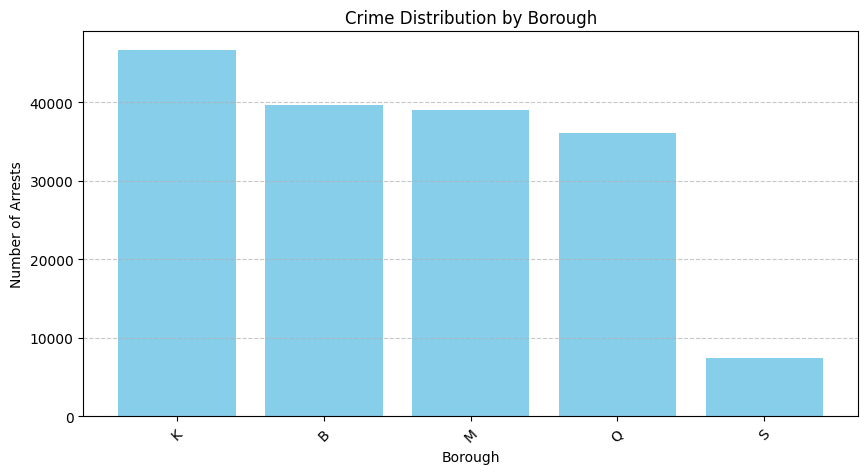

In [65]:
# Bar chart for crime distribution by borough
plt.figure(figsize=(10, 5))
plt.bar(df_pandas.groupby("ARREST_BORO").size().sort_values(ascending=False).index, df_pandas.groupby("ARREST_BORO").size().sort_values(ascending=False).values, color='skyblue')

plt.xlabel("Borough")
plt.ylabel("Number of Arrests")
plt.title("Crime Distribution by Borough")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()


In [66]:
df_pandas.groupby("ARREST_DATE").size()

,0
ARREST_DATE,
2023-01-01,431
2023-01-02,449
2023-01-03,659
2023-01-04,840
2023-01-05,783
...,...
2023-09-26,700
2023-09-27,880
2023-09-28,767


In [67]:
df_pandas["ARREST_DATE"] = pd.to_datetime(df_pandas["ARREST_DATE"], format="%Y-%m-%d")


In [68]:
df_pandas.groupby("ARREST_DATE").size()

,0
ARREST_DATE,
2023-01-01,431
2023-01-02,449
2023-01-03,659
2023-01-04,840
2023-01-05,783
...,...
2023-09-26,700
2023-09-27,880
2023-09-28,767


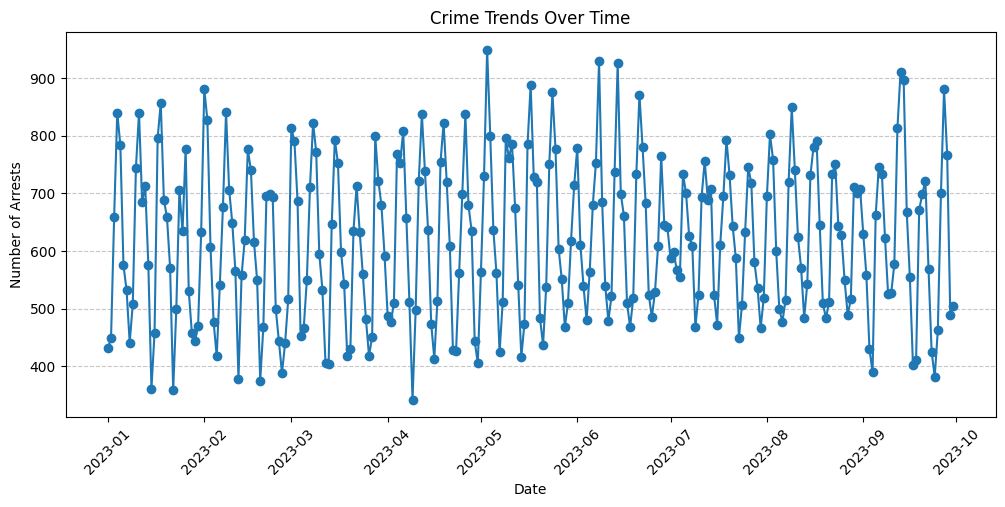

In [69]:
plt.figure(figsize=(12, 5))
# Group by "ARREST_DATE" and plot the count directly without creating a new DataFrame
plt.plot(df_pandas.groupby("ARREST_DATE").size().index,
         df_pandas.groupby("ARREST_DATE").size().values,
         marker='o', linestyle='-')

plt.xlabel("Date")
plt.ylabel("Number of Arrests")
plt.title("Crime Trends Over Time")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

In [70]:
df_pandas['month'] = df_pandas['ARREST_DATE'].dt.month


In [71]:
df_pandas['month'].head()

,month
0,1
1,2
2,2
3,1
4,2


In [72]:
df_pandas['month'] = df_pandas['ARREST_DATE'].dt.month_name()


In [73]:
df_pandas['month'].head()

,month
0,January
1,February
2,February
3,January
4,February


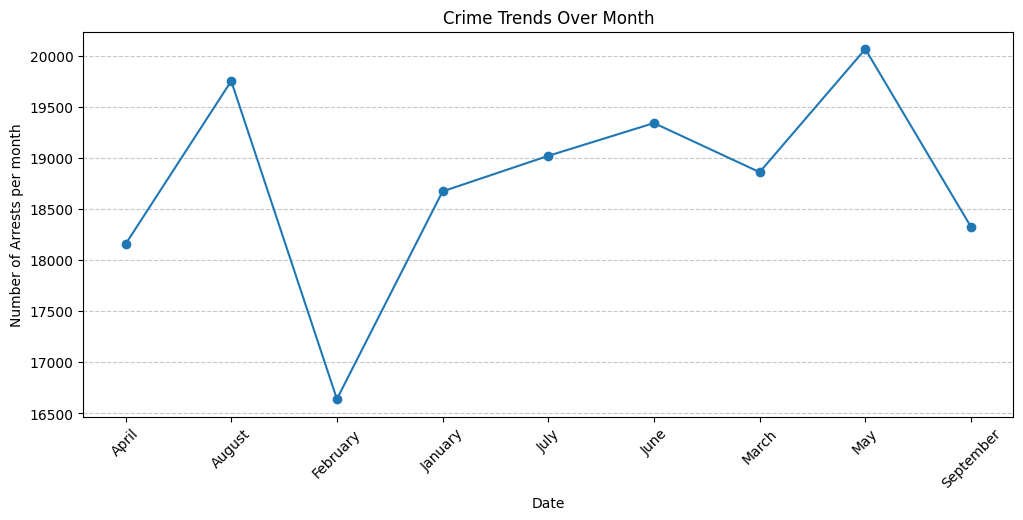

In [74]:
plt.figure(figsize=(12, 5))
# Group by "ARREST_DATE" and plot the count directly without creating a new DataFrame
plt.plot(df_pandas.groupby("month").size().index,
         df_pandas.groupby("month").size().values,
         marker='o', linestyle='-')

plt.xlabel("Date")
plt.ylabel("Number of Arrests per month")
plt.title("Crime Trends Over Month")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

In [75]:
df_pandas['year'] = df_pandas['ARREST_DATE'].dt.year


In [76]:
df_pandas['year'].head()

,year
0,2023
1,2023
2,2023
3,2023
4,2023


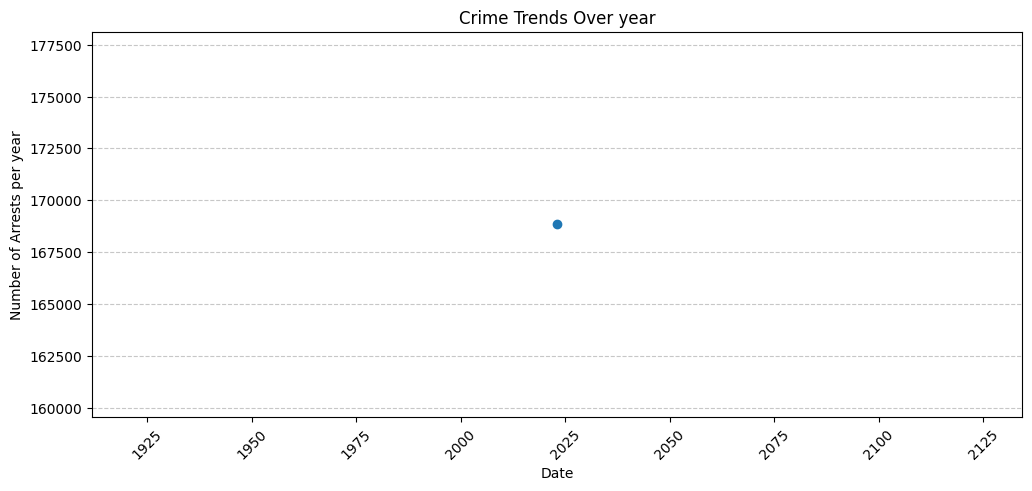

In [77]:
plt.figure(figsize=(12, 5))
# Group by "ARREST_DATE" and plot the count directly without creating a new DataFrame
plt.plot(df_pandas.groupby("year").size().index,
         df_pandas.groupby("year").size().values,
         marker='o', linestyle='-')

plt.xlabel("Date")
plt.ylabel("Number of Arrests per year")
plt.title("Crime Trends Over year")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

In [78]:
df_pandas.groupby("ARREST_PRECINCT").count()


,ARREST_KEY,PD_CD,PD_DESC,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,KEY_CODE,ARREST_DATE,LATITUDE,LONGITUDE,age_numeric,month,year
ARREST_PRECINCT,,,,,,,,,,,,,,,,,,,,
1,1664,1664,1664,1664,1664,1664,1664,1664,1664,1664,1664,1664,1664,1664,1664,1664,1664,1664,1664,1664
5,2033,2033,2033,2033,2033,2033,2033,2033,2033,2033,2033,2033,2033,2033,2033,2033,2033,2033,2033,2033
6,1716,1716,1716,1716,1716,1716,1716,1716,1716,1716,1716,1716,1716,1716,1716,1716,1716,1716,1716,1716
7,1476,1476,1476,1476,1476,1476,1476,1476,1476,1476,1476,1476,1476,1476,1476,1476,1476,1476,1476,1476
9,1511,1511,1511,1511,1511,1511,1511,1511,1511,1511,1511,1511,1511,1511,1511,1511,1511,1511,1511,1511
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,2589,2589,2589,2589,2589,2589,2589,2589,2589,2589,2589,2589,2589,2589,2589,2589,2589,2589,2589,2589
120,3599,3599,3599,3599,3599,3599,3599,3599,3599,3599,3599,3599,3599,3599,3599,3599,3599,3599,3599,3599
121,1835,1835,1835,1835,1835,1835,1835,1835,1835,1835,1835,1835,1835,1835,1835,1835,1835,1835,1835,1835


In [79]:
df_pandas.groupby("ARREST_PRECINCT").size()


,0
ARREST_PRECINCT,
1,1664
5,2033
6,1716
7,1476
9,1511
...,...
115,2589
120,3599
121,1835


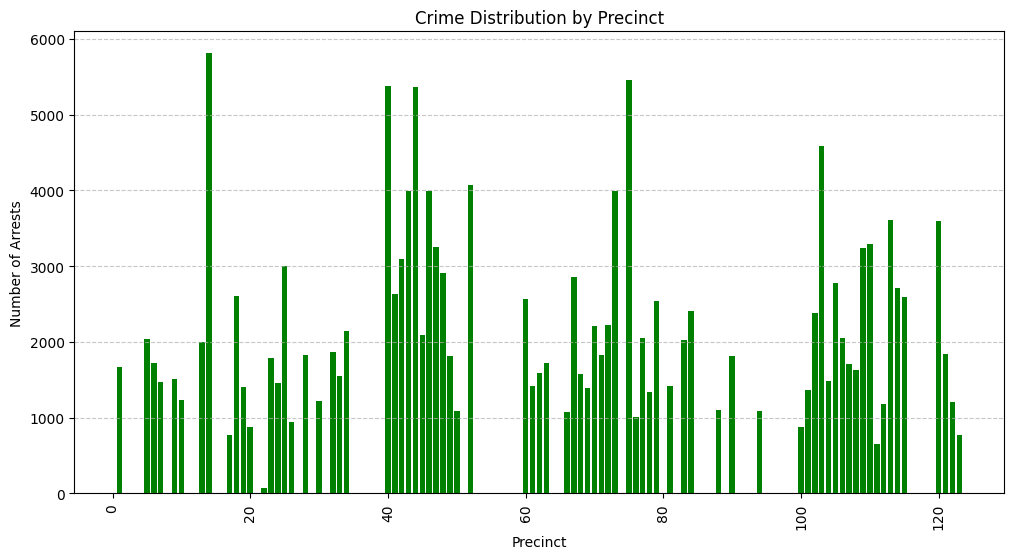

In [80]:
plt.figure(figsize=(12, 6))
plt.bar(df_pandas.groupby("ARREST_PRECINCT").size().index, df_pandas.groupby("ARREST_PRECINCT").size().values, color='green')

plt.xlabel("Precinct")
plt.ylabel("Number of Arrests")
plt.title("Crime Distribution by Precinct")
plt.xticks(rotation=90)
plt.grid(axis="y", linestyle="--", alpha=0.7)


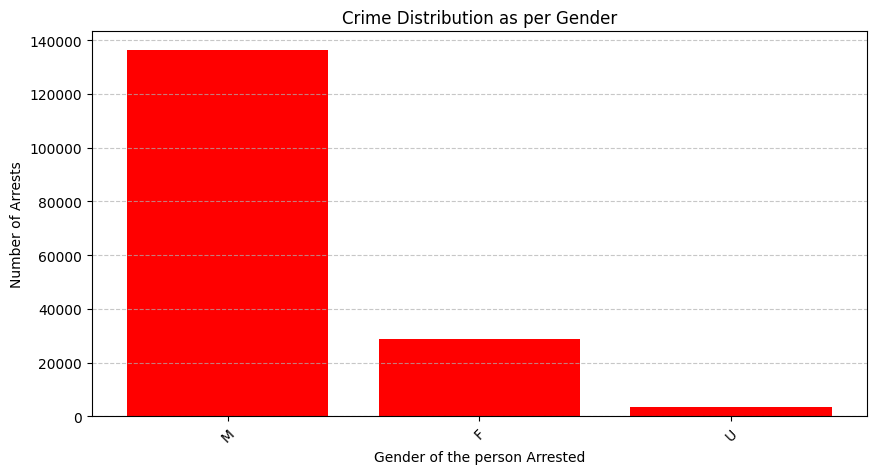

In [81]:
# Bar chart for crime distribution by borough
plt.figure(figsize=(10, 5))
plt.bar(df_pandas.groupby("PERP_SEX").size().sort_values(ascending=False).index, df_pandas.groupby("PERP_SEX").size().sort_values(ascending=False).values, color='red')

plt.xlabel("Gender of the person Arrested")
plt.ylabel("Number of Arrests")
plt.title("Crime Distribution as per Gender")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()


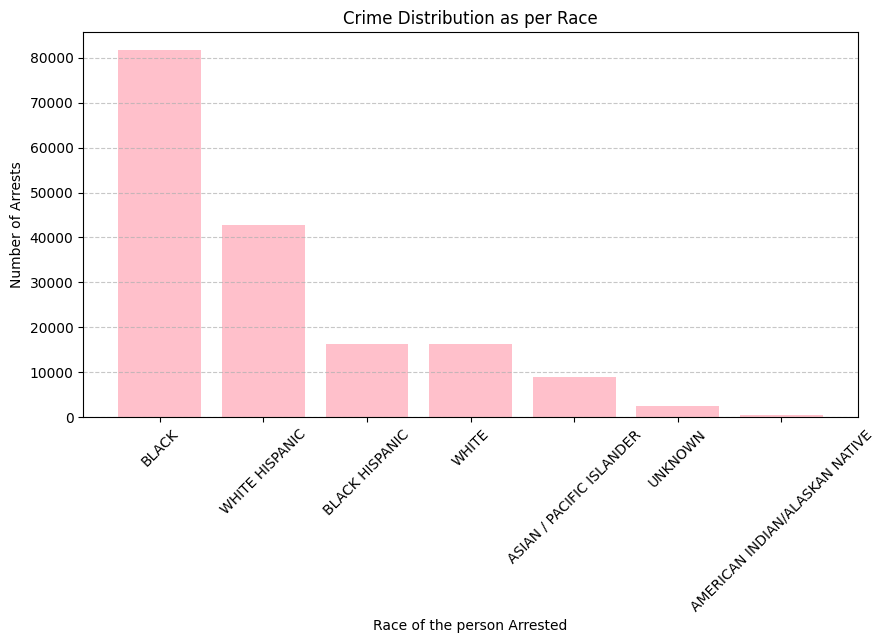

In [82]:
# Bar chart for crime distribution by borough
plt.figure(figsize=(10, 5))
plt.bar(df_pandas.groupby("PERP_RACE").size().sort_values(ascending=False).index, df_pandas.groupby("PERP_RACE").size().sort_values(ascending=False).values, color='pink')

plt.xlabel("Race of the person Arrested")
plt.ylabel("Number of Arrests")
plt.title("Crime Distribution as per Race")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()


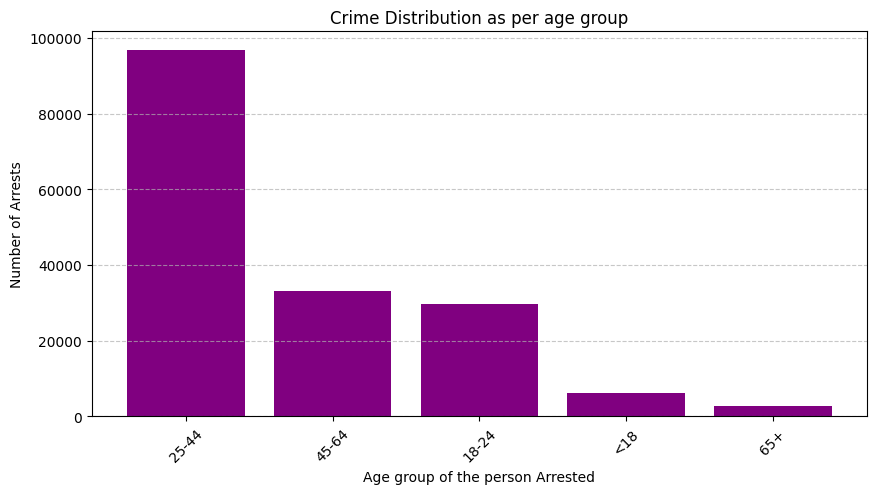

In [83]:
# Bar chart for crime distribution by borough
plt.figure(figsize=(10, 5))
plt.bar(df_pandas.groupby("AGE_GROUP").size().sort_values(ascending=False).index, df_pandas.groupby("AGE_GROUP").size().sort_values(ascending=False).values, color='purple')

plt.xlabel("Age group of the person Arrested")
plt.ylabel("Number of Arrests")
plt.title("Crime Distribution as per age group")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()


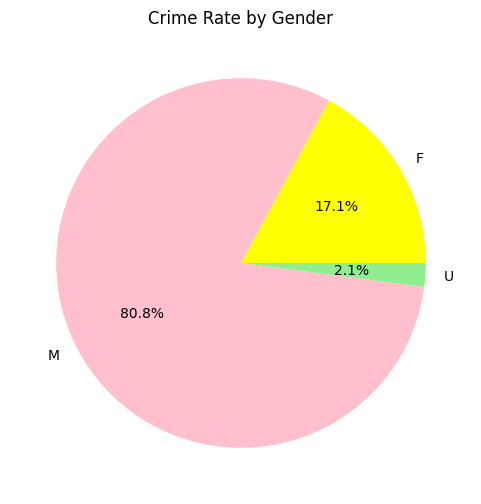

In [84]:
plt.figure(figsize=(6, 6))
plt.pie(df_pandas.groupby('PERP_SEX').size().values, labels=df_pandas.groupby("PERP_SEX").size().index, autopct='%1.1f%%', colors=["yellow", "pink", "lightgreen"])
plt.title("Crime Rate by Gender")

plt.show()

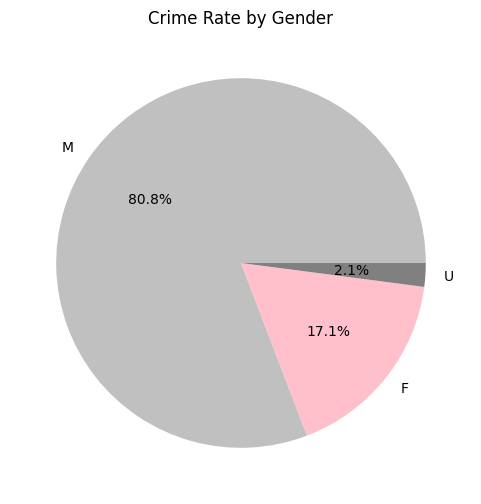

In [85]:
gender_counts = df_pandas['PERP_SEX'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(gender_counts.values,
        labels=gender_counts.index,
        autopct='%1.1f%%',
        colors=["silver", "pink", "grey"])
plt.title("Crime Rate by Gender")
plt.show()

In [86]:
pip install folium

In [87]:
import folium
from folium.plugins import HeatMap

In [88]:
# Create a NYC map
crime_map = folium.Map(location=[40.7128, -74.0060], zoom_start=12, tiles='CartoDB dark_matter')

In [89]:
heat_data = df_pandas[['LATITUDE', 'LONGITUDE']].dropna()


In [90]:
heat_data.head(5)

,LATITUDE,LONGITUDE
0,40.677425,-73.945618
1,40.655922,-73.909653
2,40.602467,-74.007118
3,40.821796,-73.943459
4,40.669174,-73.938042


In [91]:
df_pandas[['LATITUDE', 'LONGITUDE']].head()


,LATITUDE,LONGITUDE
0,40.677425,-73.945618
1,40.655922,-73.909653
2,40.602467,-74.007118
3,40.821796,-73.943459
4,40.669174,-73.938042


In [92]:
heat_data_list = heat_data.values.tolist()

In [93]:
heat_data_list[0]

[40.677425384521484, -73.94561767578125]

In [104]:
len(heat_data_list)

168838

In [94]:
HeatMap(heat_data_list, radius=15, blur=15, min_opacity=0.4, max_zoom = 13).add_to(crime_map)

In [95]:
crime_map.save("crime_heatmap.html")

In [96]:
crime_map

Output hidden; open in https://colab.research.google.com to view.

In [97]:
from sklearn.cluster import DBSCAN

In [98]:
coords = df_pandas[['LATITUDE', 'LONGITUDE']].dropna().values

In [99]:
dbscan = DBSCAN(eps=0.01, min_samples=5)  # Adjust eps based on your geographic scale.
dbscan.fit(coords)
labels = dbscan.labels_


In [134]:
unique_labels = set(labels)
n_clusters = len(unique_labels) - (1 if -1 in unique_labels else 0)
print("Number of clusters detected:", n_clusters)
print("Unique cluster labels:", unique_labels)

Number of clusters detected: 8
Unique cluster labels: {0, 1, 2, 3, 4, 5, 6, 7, -1}


In [140]:
unique_labels

{-1, 0, 1, 2, 3, 4, 5, 6, 7}

In [135]:
crime_map = folium.Map(location=[40.7128, -74.0060], zoom_start=12, tiles='CartoDB dark_matter')

In [136]:
heat_data = coords.tolist()  # Convert the coordinates to a list of lists
HeatMap(
    heat_data,
    radius=20,
    blur=15,
    min_opacity=0.4,
    max_zoom=13
).add_to(crime_map)

In [137]:
# Colors for each cluster (add more if needed)
cluster_colors = ['blue', 'green', 'red', 'purple', 'orange', 'darkred', 'darkblue', 'cadetblue']

In [138]:
for label in unique_labels:
    if label == -1:  # Skip noise points
        continue
    # Get all points in the cluster
    cluster_points = coords[labels == label]
    # Add a marker for the cluster center
    center = cluster_points.mean(axis=0)
    folium.Marker(
        location=center.tolist(),
        tooltip=f"Cluster {label}",
        icon=folium.Icon(color=cluster_colors[label % len(cluster_colors)])
    ).add_to(crime_map)

In [139]:
cluster_points

array([[ 40.604076, -73.819885],
       [ 40.610428, -73.81904 ],
       [ 40.60613 , -73.81957 ],
       [ 40.607933, -73.81604 ],
       [ 40.61117 , -73.81872 ],
       [ 40.60613 , -73.81957 ],
       [ 40.61117 , -73.81872 ],
       [ 40.609367, -73.81846 ],
       [ 40.60957 , -73.81905 ],
       [ 40.614872, -73.82164 ],
       [ 40.61426 , -73.82111 ],
       [ 40.607933, -73.81604 ],
       [ 40.61309 , -73.820175],
       [ 40.607933, -73.81604 ],
       [ 40.607933, -73.81604 ],
       [ 40.59888 , -73.82069 ],
       [ 40.607933, -73.81604 ],
       [ 40.60613 , -73.81957 ],
       [ 40.607933, -73.81604 ],
       [ 40.60957 , -73.81905 ],
       [ 40.60234 , -73.82016 ],
       [ 40.61117 , -73.81872 ],
       [ 40.60957 , -73.81905 ],
       [ 40.607933, -73.81604 ],
       [ 40.60957 , -73.81905 ],
       [ 40.60303 , -73.82005 ],
       [ 40.605118, -73.819725],
       [ 40.607933, -73.81604 ],
       [ 40.609707, -73.81904 ],
       [ 40.61117 , -73.81872 ]], dtype=flo

In [123]:
import os
print(os.path.exists('/content/maps icon.png'))  # Should return True


True


In [141]:
crime_map

Output hidden; open in https://colab.research.google.com to view.

In [149]:
!pip install geopy
import time

In [143]:
from geopy.geocoders import Nominatim

In [146]:
geolocator = Nominatim(user_agent="jani_geo_maps")

In [150]:
for label in unique_labels:
    if label == -1:  # Skip noise points
        continue
    # Get all points in the cluster
    cluster_points = coords[labels == label]
    # Calculate the cluster center
    center = cluster_points.mean(axis=0)

    # Reverse geocode the center to get the place name
    location = geolocator.reverse(center, exactly_one=True)
    time.sleep(1)
    place_name = location.address if location else "Unknown Location"

    # Add the marker with the place name as a tooltip
    folium.Marker(
        location=center.tolist(),
        tooltip=f"Cluster {label}: {place_name}",
        icon=folium.Icon(color=cluster_colors[label % len(cluster_colors)])
    ).add_to(crime_map)

In [151]:
crime_map

Output hidden; open in https://colab.research.google.com to view.

In [152]:
crime_map.save("crime_heatmap.html")

In [153]:
from pyspark.ml.feature import StringIndexer, VectorAssembler
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

In [160]:
crime_threshold = 75

In [161]:
df = df.withColumn("CRIME_HOTSPOT", when(col("ARREST_PRECINCT") >= crime_threshold, 1).otherwise(0))


In [163]:
df.select('CRIME_HOTSPOT').show(5)

+-------------+
|CRIME_HOTSPOT|
+-------------+
|            1|
|            0|
|            0|
|            0|
|            0|
+-------------+
only showing top 5 rows



In [164]:
df.select("ARREST_PRECINCT", "CRIME_HOTSPOT").show(10)

+---------------+-------------+
|ARREST_PRECINCT|CRIME_HOTSPOT|
+---------------+-------------+
|             77|            1|
|             73|            0|
|             62|            0|
|             32|            0|
|             71|            0|
|            113|            1|
|             32|            0|
|             67|            0|
|             14|            0|
|             24|            0|
+---------------+-------------+
only showing top 10 rows



In [179]:
# Convert categorical columns to numeric
indexers = [StringIndexer(inputCol=col, outputCol=col+"_index").fit(df) for col in ["ARREST_BORO", "AGE_GROUP", "PERP_SEX", "PERP_RACE"]]
for indexer in indexers:
    df = indexer.transform(df)

In [181]:
# Assemble features
feature_cols = ["ARREST_PRECINCT", "LATITUDE", "LONGITUDE", "ARREST_BORO_index", "AGE_GROUP_index", "PERP_SEX_index", "PERP_RACE_index"]
vector_assembler = VectorAssembler(inputCols=feature_cols, outputCol="features")
df = vector_assembler.transform(df)


In [170]:
print(df.columns)


['ARREST_KEY', 'PD_CD', 'PD_DESC', 'OFNS_DESC', 'LAW_CODE', 'LAW_CAT_CD', 'ARREST_BORO', 'ARREST_PRECINCT', 'JURISDICTION_CODE', 'AGE_GROUP', 'PERP_SEX', 'PERP_RACE', 'X_COORD_CD', 'Y_COORD_CD', 'KEY_CODE', 'ARREST_DATE', 'LATITUDE', 'LONGITUDE', 'age_numeric', 'ARREST_BORO_index', 'AGE_GROUP_index', 'PERP_SEX_index', 'PERP_RACE_index', 'features', 'CRIME_HOTSPOT']


In [171]:
df.select('features').show(5)

+--------------------+
|            features|
+--------------------+
|[77.0,40.67742538...|
|(7,[0,1,2],[73.0,...|
|[62.0,40.60246658...|
|[32.0,40.82179641...|
|(7,[0,1,2],[71.0,...|
+--------------------+
only showing top 5 rows



In [172]:
(train_data, test_data) = df.randomSplit([0.8, 0.2])


In [173]:
rf = RandomForestClassifier(labelCol="CRIME_HOTSPOT", featuresCol="features", numTrees=50)
model = rf.fit(train_data)


In [174]:
predictions = model.transform(test_data)


In [176]:
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml.evaluation import BinaryClassificationEvaluator

In [177]:
evaluator = BinaryClassificationEvaluator(labelCol="CRIME_HOTSPOT", metricName="areaUnderROC")

# Compute accuracy
accuracy = evaluator.evaluate(predictions)
print(f"Model AUC Score: {accuracy:.2f}")

# Show predictions
predictions.select("ARREST_PRECINCT", "CRIME_HOTSPOT", "prediction", "probability").show(10)


Model AUC Score: 1.00
+---------------+-------------+----------+--------------------+
|ARREST_PRECINCT|CRIME_HOTSPOT|prediction|         probability|
+---------------+-------------+----------+--------------------+
|             94|            1|       1.0|[0.00145768312832...|
|             94|            1|       1.0|[0.00145768312832...|
|             90|            1|       1.0|[0.00145768312832...|
|             26|            0|       0.0|           [1.0,0.0]|
|             14|            0|       0.0|[0.99998020141804...|
|             40|            0|       0.0|           [1.0,0.0]|
|             14|            0|       0.0|[0.99999881523606...|
|             14|            0|       0.0|[0.99998020141804...|
|              5|            0|       0.0|[0.99999881523606...|
|             32|            0|       0.0|[0.99998138618197...|
+---------------+-------------+----------+--------------------+
only showing top 10 rows



In [178]:
import folium
from folium.plugins import HeatMap

# Convert predictions to Pandas
df_pred = predictions.select("LATITUDE", "LONGITUDE", "prediction").toPandas()

# Create a base map centered around NYC
crime_map = folium.Map(location=[40.7128, -74.0060], zoom_start=11)

# Create heatmap
heat_data = df_pred[df_pred["prediction"] == 1][["LATITUDE", "LONGITUDE"]].values.tolist()
HeatMap(heat_data, radius=10).add_to(crime_map)

# Show Map
crime_map


In [182]:
crime_map.save("crime_heatmap_predicted.html")